# Coronavirus tweets sentiment analysis

I will be using both shallow learning and deep learning techniques
to achieve the best results in the analysis and to compare between
them

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud

In [156]:
tweets_df_train = pd.read_csv('data/corona/Corona_NLP_train.csv')
tweets_df_test = pd.read_csv('data/corona/Corona_NLP_test.csv')
tweets_df = pd.concat([tweets_df_train, tweets_df_test])
tweets_df.reset_index(inplace=True)
tweets_df.drop(columns=['index'], inplace=True)
tweets_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [157]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44955 entries, 0 to 44954
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


In [158]:
tweets_df['TweetAt'] = pd.to_datetime(tweets_df['TweetAt'])
tweets_df['TweetAt'].min(), tweets_df['TweetAt'].max()

(Timestamp('2020-01-04 00:00:00'), Timestamp('2020-12-04 00:00:00'))

Our data has been being collected for eleven months: from January 4th
to December 4th 2020

In [159]:
tweets_df.describe(include='all')

<ipython-input-159-760e23d2aaa4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  tweets_df.describe(include='all')


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,44955.000000,44955.000000,35531,44955,44955,44955
unique,NaN,NaN,13127,44,44955,5
top,NaN,NaN,United States,2020-03-20 00:00:00,@LadBabyOfficial thank you we will keep on wor...,Positive
freq,NaN,NaN,603,3448,1,12369
first,NaN,NaN,NaN,2020-01-04 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2020-12-04 00:00:00,NaN,NaN
mean,22478.000000,67430.000000,NaN,NaN,NaN,NaN
std,12977.535012,12977.535012,NaN,NaN,NaN,NaN
min,1.000000,44953.000000,NaN,NaN,NaN,NaN
25%,11239.500000,56191.500000,NaN,NaN,NaN,NaN


In [160]:
tweets_df['Location'].value_counts()

United States                  603
London, England                568
London                         565
New York, NY                   429
Washington, DC                 411
                              ... 
Never mind                       1
kashmi                           1
Home is Where your Heart is      1
Brandenburg, Deutschland         1
Online and in Print              1
Name: Location, Length: 13127, dtype: int64

<AxesSubplot:>

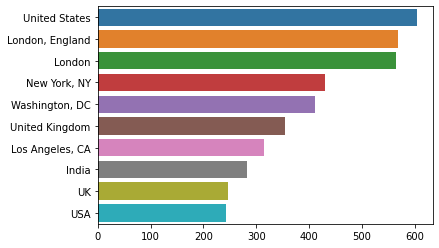

In [161]:
sns.barplot(x=tweets_df['Location'].value_counts()[:10].values,
            y=tweets_df['Location'].value_counts()[:10].index)

As we can see, the data is not cleaned - we can see USA and United
States as separate beings; the same goes with London and London, England

<AxesSubplot:xlabel='month', ylabel='count'>

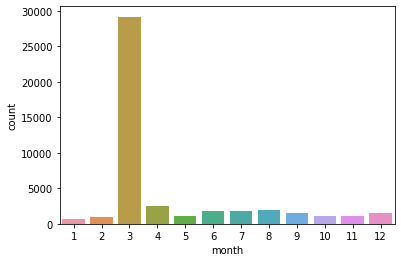

In [162]:
tweet_at_month = tweets_df.copy()
tweet_at_month['month'] = tweets_df['TweetAt'].dt.month
sns.countplot(data=tweet_at_month, x='month')

As we can see, most of the tweets were collected at the beginning of
COVID-19 pandemic in the Western world, in March that is

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

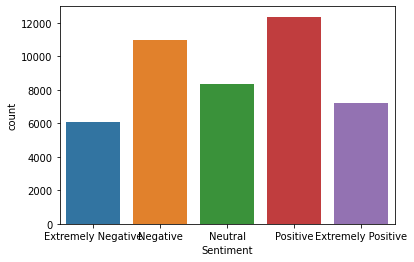

In [163]:
sns.countplot(data=tweets_df, x='Sentiment', order=['Extremely Negative', 'Negative',
                                                    'Neutral', 'Positive',
                                                    'Extremely Positive'])

For our machine learning tasks we'll only need 'OriginalTweet'
and 'Sentiment' columns

In [164]:
tweets_df = tweets_df.loc[:, ['OriginalTweet', 'Sentiment']]
tweets_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [165]:
label_dict = {'Extremely Negative': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3,
              'Extremely Positive': 4}
tweets_df['Sentiment'] = tweets_df['Sentiment'].map(label_dict)
tweets_df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,2
1,advice Talk to your neighbours family to excha...,3
2,Coronavirus Australia: Woolworths to give elde...,3
3,My food stock is not the only one which is emp...,3
4,"Me, ready to go at supermarket during the #COV...",0


In [166]:
tweets_df.isna().sum()

OriginalTweet    0
Sentiment        0
dtype: int64

In [167]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [168]:
def tokenize(text):
    return [word.lower() for sent in sent_tokenize(text) for word in word_tokenize(sent)]

def remove_punctuation(text):
    return [word for word in text if word.isalnum()]

def remove_stopwords(words):
    stopwords_set = set(stopwords.words('english'))
    return [word for word in words if word not in stopwords_set]

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

def remove_mentions(text):
    return re.sub('@[A-Za-z0-9_]+','', text)

def remove_hashtags(text):
    return re.sub('#[A-Za-z0-9_]+','', text)

In [169]:
def preprocess(text):
    no_urls = remove_urls(text)
    no_mentions = remove_mentions(no_urls)
    no_hashtags = remove_hashtags(no_mentions)
    tokenized = tokenize(no_hashtags)
    no_punct = remove_punctuation(tokenized)
    no_stopwords = remove_stopwords(no_punct)
    return no_stopwords

In [170]:
tweets_df['OriginalTweet'] = tweets_df['OriginalTweet'].apply(lambda x: preprocess(x))
tweets_df.head()

,OriginalTweet,Sentiment
0,[],2
1,"[advice, talk, neighbours, family, exchange, p...",3
2,"[coronavirus, australia, woolworths, give, eld...",3
3,"[food, stock, one, empty, please, panic, enoug...",3
4,"[ready, go, supermarket, outbreak, paranoid, f...",0


In [171]:
def glue_words_into_text(words):
    return ' '.join(words)

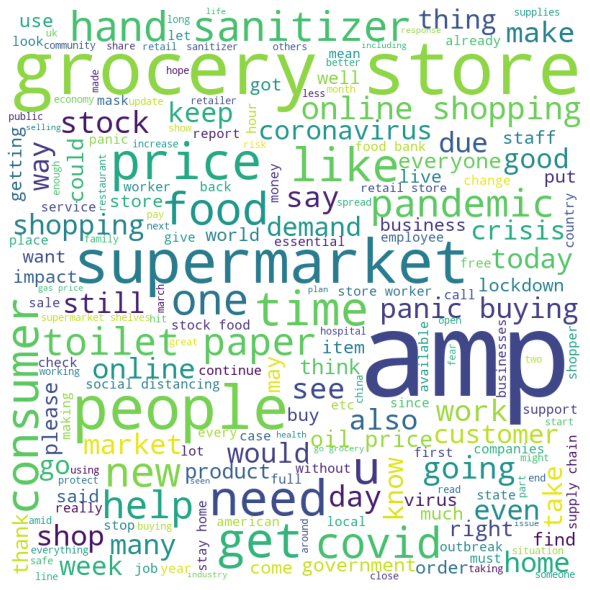

In [172]:
wordcloud = WordCloud(width=800, height=800, background_color='white',
                      stopwords=set(stopwords.words('english')),
                      min_font_size=10).generate(''.join(tweets_df['OriginalTweet']
                                                         .apply(lambda x: glue_words_into_text(x))))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [173]:
tweets_df.replace('', np.nan, inplace=True)
tweets_df.head()

,OriginalTweet,Sentiment
0,[],2
1,"[advice, talk, neighbours, family, exchange, p...",3
2,"[coronavirus, australia, woolworths, give, eld...",3
3,"[food, stock, one, empty, please, panic, enoug...",3
4,"[ready, go, supermarket, outbreak, paranoid, f...",0


In [174]:
def word_lemmatizer(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]


def word_stemmer(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

In [175]:
tweets_df.rename(columns={'OriginalTweet': 'text', 'Sentiment': 'label'}, inplace=True)
tweets_df.head()

,text,label
0,[],2
1,"[advice, talk, neighbours, family, exchange, p...",3
2,"[coronavirus, australia, woolworths, give, eld...",3
3,"[food, stock, one, empty, please, panic, enoug...",3
4,"[ready, go, supermarket, outbreak, paranoid, f...",0


In [176]:
X_lemmatized = tweets_df.drop(columns=['label'])
X_lemmatized['text'] = tweets_df['text'].apply(lambda x: word_lemmatizer(x))
X_lemmatized.head()

,text
0,[]
1,"[advice, talk, neighbour, family, exchange, ph..."
2,"[coronavirus, australia, woolworth, give, elde..."
3,"[food, stock, one, empty, please, panic, enoug..."
4,"[ready, go, supermarket, outbreak, paranoid, f..."


In [177]:
X_stemmed = tweets_df.drop(columns=['label'])
X_stemmed['text'] = X_stemmed['text'].apply(lambda x: word_stemmer(x))
X_stemmed.head()

,text
0,[]
1,"[advic, talk, neighbour, famili, exchang, phon..."
2,"[coronaviru, australia, woolworth, give, elder..."
3,"[food, stock, one, empti, pleas, panic, enough..."
4,"[readi, go, supermarket, outbreak, paranoid, f..."


In [178]:
X_lemmatized['text'] = X_lemmatized['text'].apply(lambda x: glue_words_into_text(x))
X_lemmatized.head()

,text
0,
1,advice talk neighbour family exchange phone nu...
2,coronavirus australia woolworth give elderly d...
3,food stock one empty please panic enough food ...
4,ready go supermarket outbreak paranoid food st...


In [179]:
X_stemmed['text'] = X_stemmed['text'].apply(lambda x: glue_words_into_text(x))
X_stemmed.head()

,text
0,
1,advic talk neighbour famili exchang phone numb...
2,coronaviru australia woolworth give elderli di...
3,food stock one empti pleas panic enough food e...
4,readi go supermarket outbreak paranoid food st...


In [180]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(tweets_df['label'])

To progress to NLP tasks, we have to vectorize our data. At first, let's
go with lemmatized dataset

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [182]:
def predict_on_model(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    return model.predict(x_test)

In [183]:
def plot_results(y_test, y_pred):
    score = accuracy_score(y_test_lemm, y_pred)
    print('Accuracy: ' + str(score))
    plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred),
                          show_absolute=True,
                          show_normed=True,
                          colorbar=True)
    plt.show()

In [184]:
X_train_lemm, X_test_lemm, y_train_lemm, y_test_lemm = train_test_split(X_lemmatized['text'], y,
                                                                        random_state=42)
X_train_stem, X_test_stem, y_train_stem, y_test_stem = train_test_split(X_stemmed['text'], y,
                                                                        random_state=42)

In [185]:
count_vectorizer = CountVectorizer(ngram_range=(2, 3))
tfidf = TfidfTransformer()
pipeline = Pipeline([('count_vectorizer', count_vectorizer), ('tfidf', tfidf)])

In [186]:
X_train_lemm = pipeline.fit_transform(X_train_lemm)
X_test_lemm = pipeline.transform(X_test_lemm)
X_train_stem = pipeline.fit_transform(X_train_stem)
X_test_stem = pipeline.transform(X_test_stem)

Accuracy: 0.3679152949550672


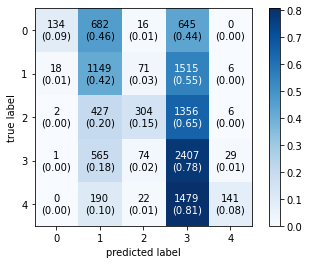

In [187]:
mnb = MultinomialNB()

y_predicted = predict_on_model(mnb, X_train_lemm, y_train_lemm, X_test_lemm)
plot_results(y_test_lemm, y_predicted)

Accuracy: 0.36933890915561884


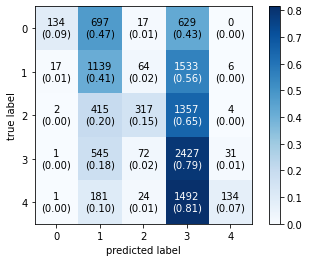

In [188]:
y_predicted = predict_on_model(mnb, X_train_stem, y_train_stem, X_test_stem)
plot_results(y_test_stem, y_predicted)

Accuracy: 0.4016371563306344


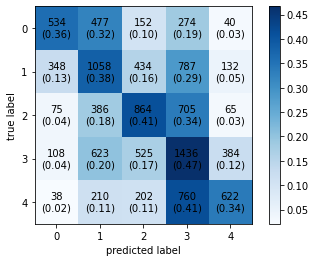

In [189]:
svc = LinearSVC()

y_predicted = predict_on_model(svc, X_train_lemm, y_train_lemm, X_test_lemm)
plot_results(y_test_stem, y_predicted)

Accuracy: 0.40421745706913426


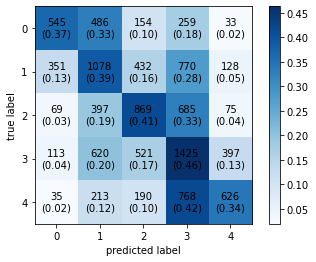

In [190]:
y_predicted = predict_on_model(svc, X_train_stem, y_train_stem, X_test_stem)
plot_results(y_test_stem, y_predicted)

Accuracy: 0.3982560726043242


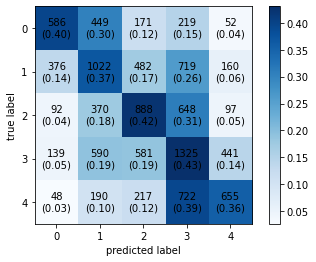

In [191]:
passive_aggressive = PassiveAggressiveClassifier()

y_predicted = predict_on_model(passive_aggressive, X_train_lemm, y_train_lemm, X_test_lemm)
plot_results(y_test_stem, y_predicted)

Accuracy: 0.4001245662425483


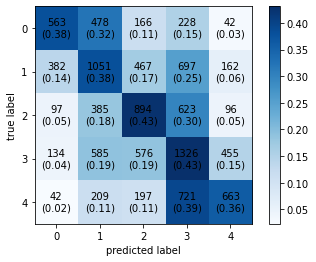

In [192]:
y_predicted = predict_on_model(passive_aggressive, X_train_stem, y_train_stem, X_test_stem)
plot_results(y_test_stem, y_predicted)

Shallow learning models perform very poorly on this dataset. Lemmatization turned out to
bring a little bit better results.

Moving on to deep learning problem-solving approach.
We are going to use GRUs as our sequences aren't very long and this way we can gain
something in terms of performance

In [239]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [227]:
def prepare_to_neural_network(X_df, vocabulary_size):
    X_temp = X_df['text'].apply(lambda x: one_hot(x, vocabulary_size))
    max_sentence_length = X_temp.map(len).max()
    return pad_sequences(X_temp, padding='pre', maxlen=max_sentence_length), max_sentence_length

In [228]:
voc_size = 10000

X_stem_nn, stem_max_sent_length = prepare_to_neural_network(X_stemmed, voc_size)
X_lemm_nn, lemm_max_sent_length = prepare_to_neural_network(X_lemmatized, voc_size)

In [230]:
def divide_into_three_parts(X_df, y_df, test_size=.15, val_size=.15):
    X_temp, X_test, y_temp, y_test = train_test_split(X_df, y_df, test_size=test_size, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42)

    return X_train, X_test, X_val, y_train, y_test, y_val

In [206]:
X_train_stem, X_test_stem, X_val_stem, y_train_stem, y_test_stem, y_val_stem = \
    divide_into_three_parts(X_stem_nn, y)

In [257]:
embedding_vector_features = 50


def build_model(embedding_vector, max_sentence_length):
    model = Sequential()
    model.add(Embedding(voc_size, embedding_vector, input_length=max_sentence_length))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(.3))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [258]:
stem_model = build_model(embedding_vector_features, stem_max_sent_length)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_22 (Embedding)     (None, 45, 50)            500000    
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 512)               473088    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 5)                 325       
Total params: 1,006,245
Trainable params: 1,006,245
Non-trainable params: 0
___________________________________________

In [259]:
batch_size = 128

stem_model.fit(X_train_stem, y_train_stem, epochs=10, batch_size=batch_size,
               callbacks=[EarlyStopping(patience=3)],
          validation_data=(X_val_stem, y_val_stem))

Epoch 1/10
254/254 [==============================] - 20s 61ms/step - loss: 1.4609 - accuracy: 0.3372 - val_loss: 0.9626 - val_accuracy: 0.6148

In [260]:
stem_model.evaluate(X_test_stem, y_test_stem)

211/211 [==============================] - 2s 10ms/step - loss: 1.0382 - accuracy: 0.6324

[1.0381892919540405, 0.6324139833450317]

In [261]:
X_train_lemm, X_test_lemm, X_val_lemm, y_train_lemm, y_test_lemm, y_val_lemm = \
    divide_into_three_parts(X_lemm_nn, y)

In [262]:
lemm_model = build_model(embedding_vector_features, lemm_max_sent_length)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 45, 50)            500000    
_________________________________________________________________
bidirectional_21 (Bidirectio (None, 512)               473088    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 64)                32832     
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 5)                 325       
Total params: 1,006,245
Trainable params: 1,006,245
Non-trainable params: 0
___________________________________________

In [263]:
lemm_model.fit(X_train_lemm, y_train_lemm, epochs=10, batch_size=batch_size,
               callbacks=[EarlyStopping(patience=3)],
          validation_data=(X_val_lemm, y_val_lemm))

Epoch 1/10
254/254 [==============================] - 21s 58ms/step - loss: 1.5198 - accuracy: 0.3055 - val_loss: 1.0237 - val_accuracy: 0.5851

In [264]:
lemm_model.evaluate(X_test_lemm, y_test_lemm)

211/211 [==============================] - 2s 10ms/step - loss: 1.1195 - accuracy: 0.6108

[1.1195100545883179, 0.6107650995254517]

As we can see, neural networks also didn't provide us with some extraordinary results -
we can only be about 60% certain that this labeling algorithm is right.

All methods of this sentiment analysis showed that there is no significant difference
between stemming and lemmatization-prepared data results.